In [1]:
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
import polars as pl

In [5]:
COORDINATES = ["chrom", "pos", "ref", "alt"]

V = {
    "Mendelian traits": (
        pl.read_parquet(
            "../../results/dataset/mendelian_traits_matched_9/test.parquet"
        )
        .filter(pl.col("label"))
        .select(COORDINATES)
    ),
    "Complex traits": (
        pl.read_parquet(
            "../../results/dataset/complex_traits_matched_9/test.parquet"
        )
        .filter(pl.col("label"))
        .select(COORDINATES)
    ),
    "eQTL": pl.read_parquet("../../results/eqtl/pos.parquet")
}
V = {k: set(v.to_pandas().apply(tuple, axis=1)) for k, v in V.items()}
V

{'Mendelian traits': {('1', 7961859, 'C', 'G'),
  ('1', 9943502, 'A', 'T'),
  ('1', 9943503, 'C', 'T'),
  ('1', 11023351, 'G', 'A'),
  ('1', 21509427, 'C', 'T'),
  ('1', 25816825, 'T', 'C'),
  ('1', 45015501, 'G', 'T'),
  ('1', 55039507, 'C', 'A'),
  ('1', 90916206, 'C', 'T'),
  ('1', 90916786, 'G', 'C'),
  ('1', 91022191, 'G', 'T'),
  ('1', 100195897, 'T', 'G'),
  ('1', 112956192, 'C', 'T'),
  ('1', 155301467, 'T', 'C'),
  ('1', 155301478, 'C', 'G'),
  ('1', 160032009, 'G', 'C'),
  ('1', 171652619, 'G', 'A'),
  ('1', 171652737, 'A', 'C'),
  ('1', 173917430, 'G', 'C'),
  ('1', 209802016, 'T', 'A'),
  ('1', 228149860, 'A', 'G'),
  ('10', 23219376, 'A', 'C'),
  ('10', 23219434, 'A', 'G'),
  ('10', 23219436, 'A', 'G'),
  ('10', 23219508, 'A', 'G'),
  ('10', 23219517, 'A', 'C'),
  ('10', 27100442, 'G', 'A'),
  ('10', 27100444, 'G', 'A'),
  ('10', 27100445, 'G', 'T'),
  ('10', 27100447, 'T', 'G'),
  ('10', 27100451, 'A', 'C'),
  ('10', 27100452, 'A', 'C'),
  ('10', 27100453, 'T', 'C'),
  ('

In [14]:
def plot_venn2(d1, d2):
    plt.figure(figsize=(4, 4))
    venn = venn2([V[d1], V[d2]], [d1, d2])
    venn

def plot_venn3(d1, d2, d3):
    plt.figure(figsize=(10, 10))
    venn = venn3([V[d1], V[d2], V[d3]], [d1, d2, d3])
    venn

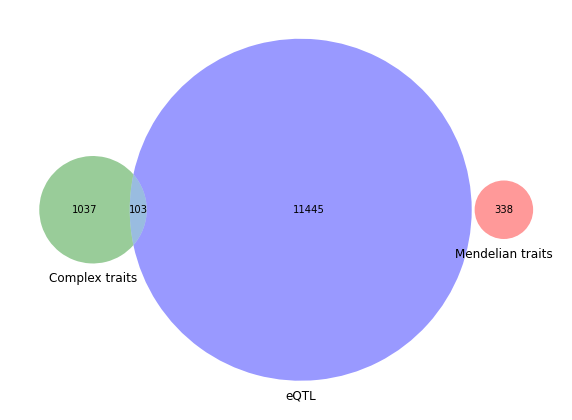

In [15]:
plot_venn3("Mendelian traits", "Complex traits", "eQTL")

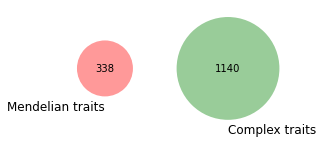

In [11]:
plot_venn2("Mendelian traits", "Complex traits")

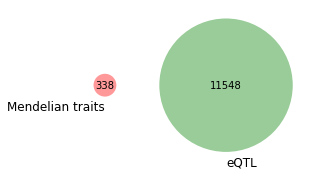

In [12]:
plot_venn2("Mendelian traits", "eQTL")

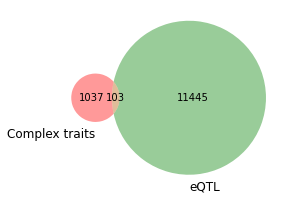

In [ ]:
# maybe rather than venn plot, just report the number of shared variants
plot_venn2("Complex traits", "eQTL")